In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import chardet  # Para detectar la codificación

# Detectar la codificación del archivo
def detectar_codificacion(file_path):
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']

def cargar_archivo(file_path):
    encoding_detectada = detectar_codificacion(file_path)
    print(f'Codificación detectada para {file_path}: {encoding_detectada}')
    return pd.read_csv(file_path, delimiter='\t', encoding=encoding_detectada)

traficogt = cargar_archivo('traficogt.txt')
tioberny = cargar_archivo('tioberny.txt')
print("Columnas de traficogt:", traficogt.columns)
print("Columnas de tioberny:", tioberny.columns)


Codificación detectada para traficogt.txt: UTF-16
Codificación detectada para tioberny.txt: UTF-16
Columnas de traficogt: Index(['{"id": 1834236045598056867, "id_str": "1834236045598056867", "url": "https://x.com/traficogt/status/1834236045598056867", "date": "2024-09-12 14:22:06+00:00", "user": {"id": 93938886, "id_str": "93938886", "url": "https://x.com/traficogt", "username": "traficogt", "displayname": "traficoGT", "rawDescription": "Noticias de ciudad de Guatemala", "created": "2009-12-01 20:42:19+00:00", "followersCount": 314368, "friendsCount": 137, "statusesCount": 52385, "favouritesCount": 3471, "listedCount": 291, "mediaCount": 1292, "location": "Guatemala", "profileImageUrl": "https://pbs.twimg.com/profile_images/1782036597841530880/-tVuhOdK_normal.jpg", "profileBannerUrl": null, "protected": null, "verified": false, "blue": false, "blueType": null, "descriptionLinks": [], "pinnedIds": [], "_type": "snscrape.modules.twitter.User"}, "lang": "es", "rawContent": "Es comprensibl

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd
import json
import re

# Lista de stopwords comunes en español
stopwords_espanol = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por',
    'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero',
    'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando',
    'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien',
    'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra',
    'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos',
    'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos',
    'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas',
    'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus',
    'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías',
    'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro',
    'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras',
    'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté',
    'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'estará', 'estaremos',
    'estaréis', 'estarán', 'estaría', 'estarías', 'estaríamos', 'estaríais', 'estarían',
    'estaba', 'estabas', 'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste',
    'estuvo', 'estuvimos', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras',
    'estuviéramos', 'estuvierais', 'estuvieran', 'estuviese', 'estuvieses',
    'estuviésemos', 'estuvieseis', 'estuviesen', 'estando', 'estado', 'estada',
    'estados', 'estadas', 'estad'
]


def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_espanol]
    return ' '.join(filtered_words)


def is_valid_json(line):
    try:
        json.loads(line)
        return True
    except json.JSONDecodeError:
        return False


def cargar_y_limpiar_archivo(file_path):
    tweets_limpios = []
    with open(file_path, 'r', encoding='utf-16') as file:
        for line_number, line in enumerate(file, 1):
            if is_valid_json(line):
                try:
                    tweet = json.loads(line)  
                    raw_content = tweet.get('rawContent', '')  
                    if raw_content:
                        cleaned_text = clean_text(raw_content) 
                        tweets_limpios.append({
                            'rawContent': raw_content,
                            'cleaned_text': cleaned_text
                        })
                except json.JSONDecodeError as e:
                    print(f"Error decodificando JSON en la línea {line_number}: {e}")
            else:
                print(f"Línea {line_number} no es un JSON válido, omitiendo...")
    return pd.DataFrame(tweets_limpios)

traficogt_df = cargar_y_limpiar_archivo('traficogt.txt')
tioberny_df = cargar_y_limpiar_archivo('tioberny.txt')


traficogt_df.to_csv('traficogt_limpiado.csv', index=False, encoding='utf-8')
tioberny_df.to_csv('tioberny_limpiado.csv', index=False, encoding='utf-8')


print("Ejemplos de tweets limpiados de traficogt:")
print(traficogt_df.head())
print("\nEjemplos de tweets limpiados de tioberny:")
print(tioberny_df.head())


Línea 5605 no es un JSON válido, omitiendo...
Ejemplos de tweets limpiados de traficogt:
                                          rawContent  \
0  Es comprensible la resolución... El ruso sabe ...   
1  La corrupción de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                        cleaned_text  
0  es comprensible resolución ruso sabe engrasar ...  
1  corrupción es descarada falsificación document...  
2                                                     
3                                                     
4  urgente zona deterioro tala inmoderada tráfico...  

Ejemplos de tweets limpiados de tioberny:
                                          rawContent  \
0  _\nConfirmado Compañeres,\n\nEl impuesto por l...   
1  #URGENTE Lo que los medios #faferos no informa...   
2  @IvanDuque @BArevalodeLeon Con

3.2 ,3.3

In [6]:
import pandas as pd
import json
import re

def normalize_username(username):
    return username.lower().replace('@', '').strip()

def extract_metadata(tweet):
    mentions = [normalize_username(mention['username']) for mention in tweet.get('mentionedUsers', [])]
    
    in_reply_to = tweet.get('inReplyToUser', {})
    in_reply_to_username = in_reply_to.get('username', None) if in_reply_to else None
    
    retweeted_tweet = tweet.get('retweetedTweet', {})
    retweeted_user = retweeted_tweet.get('user', {}).get('username', None) if retweeted_tweet else None
    
    return mentions, normalize_username(in_reply_to_username) if in_reply_to_username else None, normalize_username(retweeted_user) if retweeted_user else None


def cargar_y_procesar_archivo(file_path):
    tweets_data = []
    with open(file_path, 'r', encoding='utf-16') as file:
        for line_number, line in enumerate(file, 1):
            try:
                tweet = json.loads(line) 
                raw_content = tweet.get('rawContent', '') 
                mentions, in_reply_to, retweeted_user = extract_metadata(tweet)
                if raw_content:
                    cleaned_text = clean_text(raw_content)  
                    tweets_data.append({
                        'rawContent': raw_content,
                        'cleaned_text': cleaned_text,
                        'mentions': mentions,
                        'in_reply_to': in_reply_to,
                        'retweeted_user': retweeted_user
                    })
            except json.JSONDecodeError as e:
                print(f"Error decodificando JSON en la línea {line_number}: {e}")
    return pd.DataFrame(tweets_data)

traficogt_df = cargar_y_procesar_archivo('traficogt.txt')
tioberny_df = cargar_y_procesar_archivo('tioberny.txt')


traficogt_df.to_csv('traficogt_procesado.csv', index=False, encoding='utf-8')
tioberny_df.to_csv('tioberny_procesado.csv', index=False, encoding='utf-8')


print("Ejemplos de tweets procesados de traficogt:")
print(traficogt_df[['rawContent', 'mentions', 'in_reply_to', 'retweeted_user']].head())
print("\nEjemplos de tweets procesados de tioberny:")
print(tioberny_df[['rawContent', 'mentions', 'in_reply_to', 'retweeted_user']].head())


Error decodificando JSON en la línea 5605: Expecting ',' delimiter: line 1 column 4314 (char 4313)
Ejemplos de tweets procesados de traficogt:
                                          rawContent  \
0  Es comprensible la resolución... El ruso sabe ...   
1  La corrupción de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                            mentions     in_reply_to  \
0                                                 []            None   
1                                     [cc_guatemala]            None   
2  [pncdeguatemala, mingobguate, fjimenezmingob, ...  pncdeguatemala   
3  [amilcarmontejo, aztecanoticiagt, bancadasemil...  estaciondoblea   
4  [soy_502, aztecanoticiagt, conapgt, denunciaem...      cubreserva   

  retweeted_user  
0           None  
1           None  
2           None  
3          

C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128064 (\N{EY

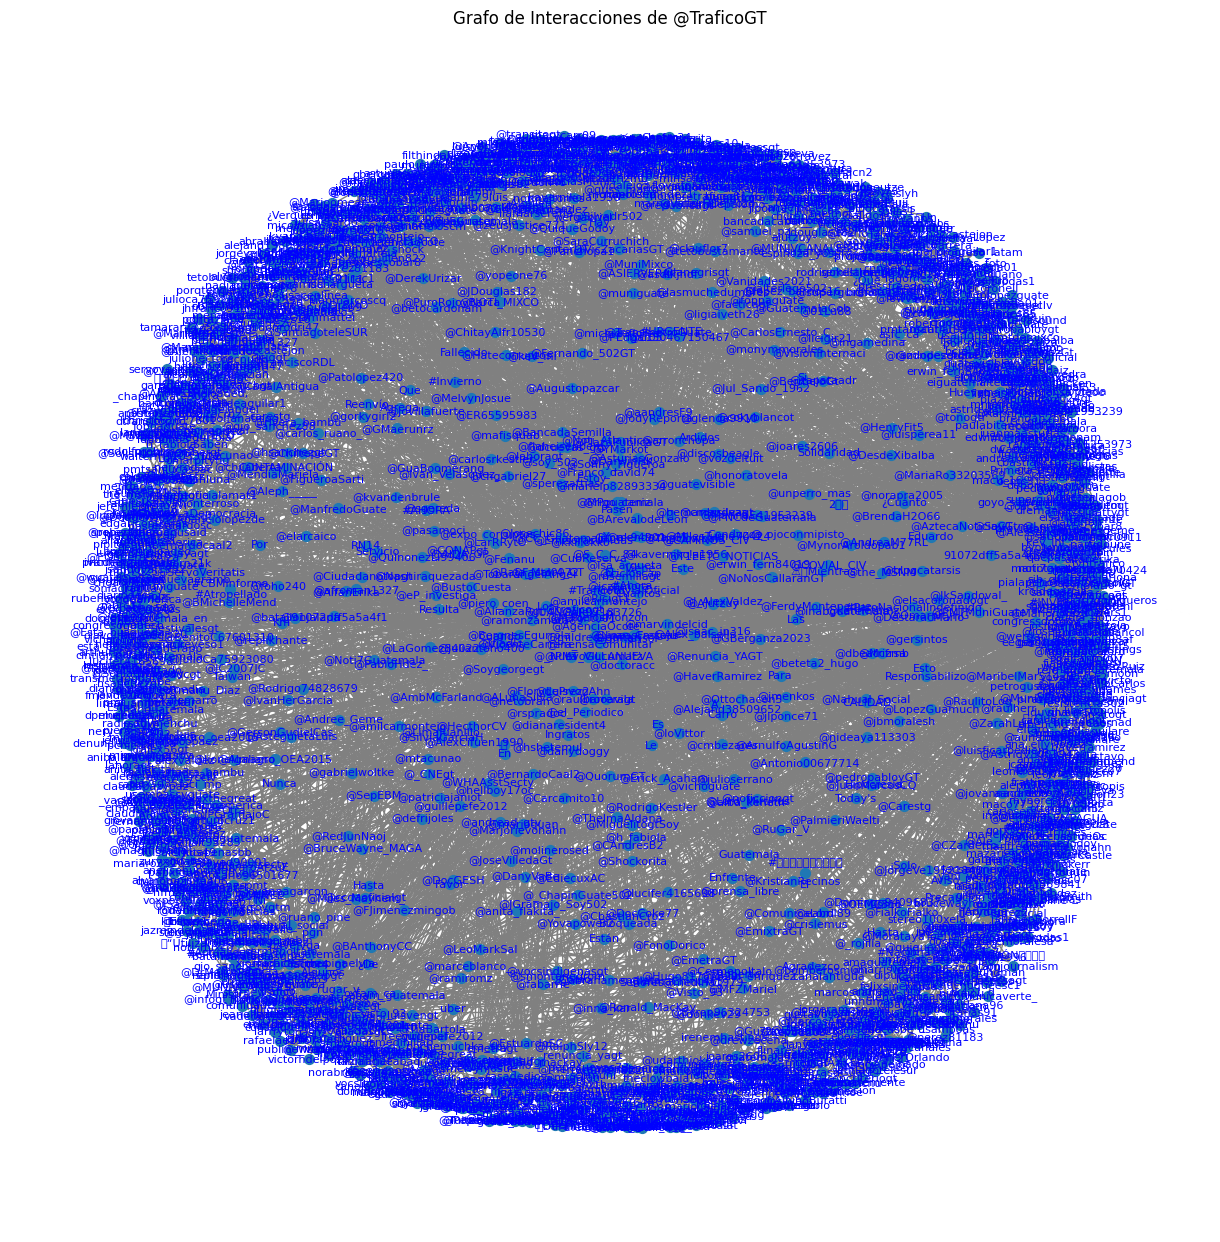

C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127485 (\N{REGIONAL INDICATOR SYMBOL LETTER X}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128992 (\N{LARGE

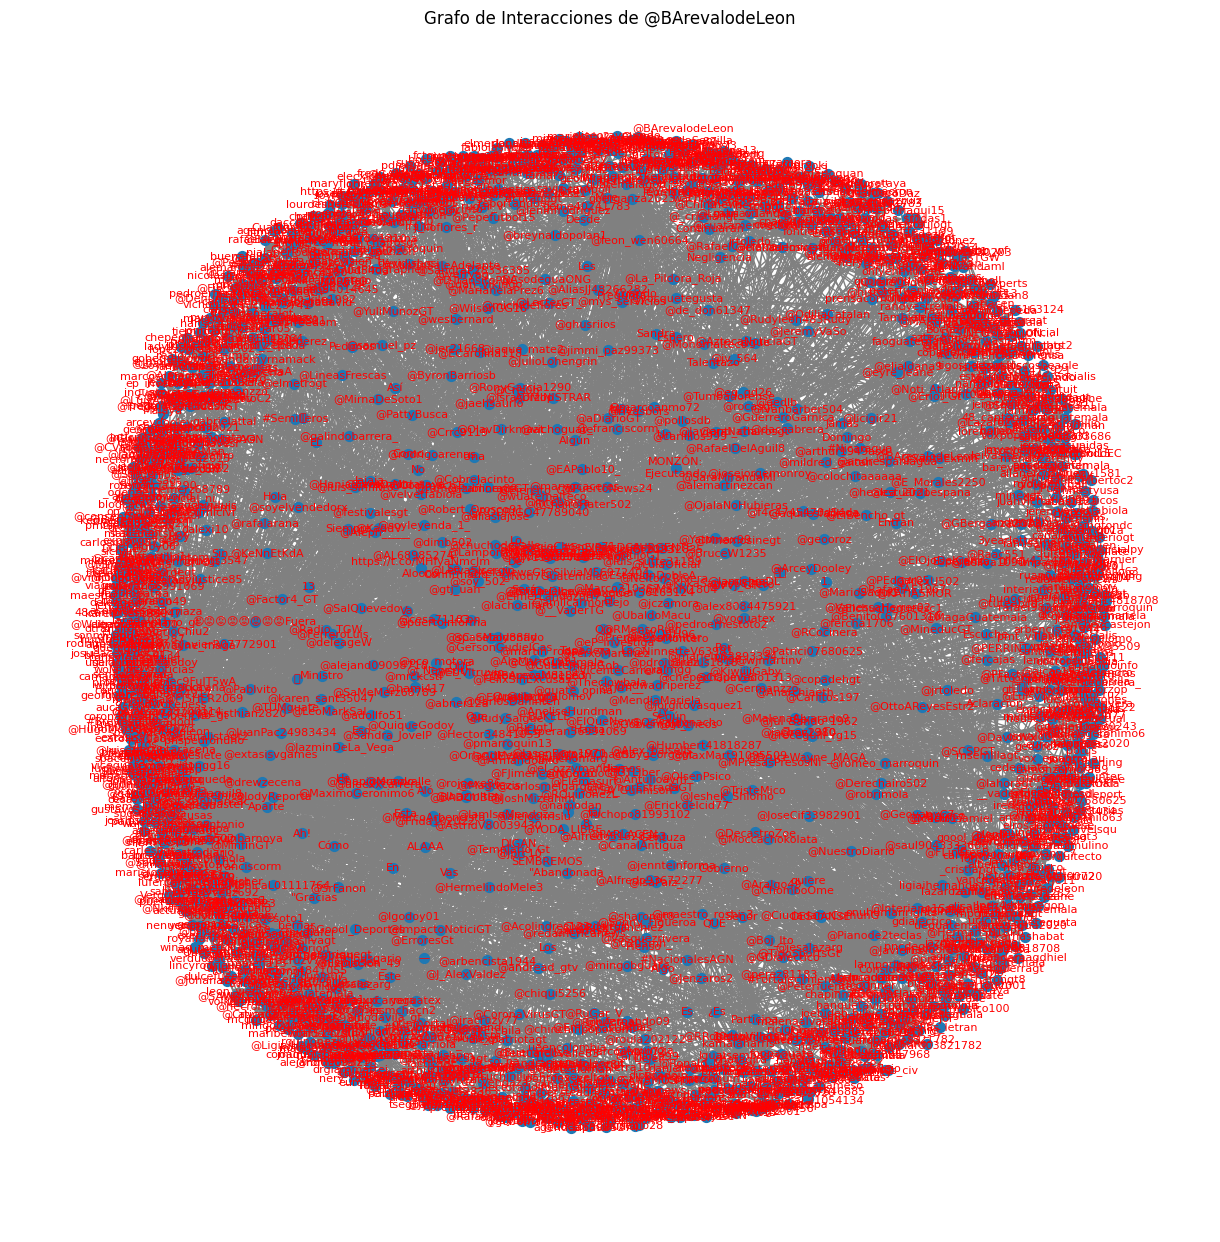

Grafo @TraficoGT: 1998 nodos, 3798 aristas
Grafo @BArevalodeLeon: 1916 nodos, 4450 aristas


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Función para construir el grafo a partir de los DataFrames procesados
def construir_grafo_interacciones(df):
    G = nx.DiGraph()  # Crear un grafo dirigido
    
    for _, row in df.iterrows():
        user = row['rawContent'].split(' ')[0] 
        
        # Añadir aristas para menciones
        for mention in row['mentions']:
            if mention and user:
                G.add_edge(user, mention, interaction='mention')
        
        # Añadir aristas para respuestas
        if row['in_reply_to']:
            G.add_edge(user, row['in_reply_to'], interaction='reply')
        
        # Añadir aristas para retweets
        if row['retweeted_user']:
            G.add_edge(user, row['retweeted_user'], interaction='retweet')
    
    return G


grafo_traficogt = construir_grafo_interacciones(traficogt_df)
grafo_tioberny = construir_grafo_interacciones(tioberny_df)

# Visualizar el grafo de TraficoGT
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(grafo_traficogt, k=0.5, iterations=50)  # Generar la posición de los nodos
nx.draw(grafo_traficogt, pos, with_labels=True, node_size=50, font_size=8, font_color='blue', edge_color='gray')
plt.title("Grafo de Interacciones de @TraficoGT")
plt.show()

# Visualizar el grafo de tioberny
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(grafo_tioberny, k=0.5, iterations=50)
nx.draw(grafo_tioberny, pos, with_labels=True, node_size=50, font_size=8, font_color='red', edge_color='gray')
plt.title("Grafo de Interacciones de @BArevalodeLeon")
plt.show()


adjacency_matrix_traficogt = nx.adjacency_matrix(grafo_traficogt)
adjacency_matrix_tioberny = nx.adjacency_matrix(grafo_tioberny)

adj_matrix_df_traficogt = pd.DataFrame(adjacency_matrix_traficogt.todense(), 
                                       index=grafo_traficogt.nodes(), 
                                       columns=grafo_traficogt.nodes())

adj_matrix_df_tioberny = pd.DataFrame(adjacency_matrix_tioberny.todense(), 
                                      index=grafo_tioberny.nodes(), 
                                      columns=grafo_tioberny.nodes())

adj_matrix_df_traficogt.to_csv('adjacency_matrix_traficogt.csv', encoding='utf-8')
adj_matrix_df_tioberny.to_csv('adjacency_matrix_tioberny.csv', encoding='utf-8')

print(f"Grafo @TraficoGT: {grafo_traficogt.number_of_nodes()} nodos, {grafo_traficogt.number_of_edges()} aristas")
print(f"Grafo @BArevalodeLeon: {grafo_tioberny.number_of_nodes()} nodos, {grafo_tioberny.number_of_edges()} aristas")


4. Análisis exploratorio


In [8]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def extract_mentions_hashtags(df):
    mentions = []
    hashtags = []
    
    for content in df['rawContent']:
        mentions += re.findall(r'@\w+', content)  
        hashtags += re.findall(r'#\w+', content)  
    
    return mentions, hashtags


def basic_analysis(df, title):
    print(f"Análisis Básico de {title}")
    
 
    num_tweets = len(df)
    print(f"Número total de tweets: {num_tweets}")
    mentions, hashtags = extract_mentions_hashtags(df)
    num_mentions = len(mentions)
    unique_mentions = len(set(mentions))
    print(f"Número total de menciones: {num_mentions}")
    print(f"Número de menciones únicas: {unique_mentions}")
    
    # Número de hashtags
    num_hashtags = len(hashtags)
    unique_hashtags = len(set(hashtags))
    print(f"Número total de hashtags: {num_hashtags}")
    print(f"Número de hashtags únicos: {unique_hashtags}")
    
 
    common_hashtags = Counter(hashtags).most_common(10)
    print(f"Hashtags más comunes: {common_hashtags}")


def generate_wordcloud(df, title):
    all_words = ' '.join(df['cleaned_text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras de {title}')
    plt.show()

basic_analysis(traficogt_df, 'TráficoGT')



basic_analysis(tioberny_df, 'TioBerny')





Análisis Básico de TráficoGT
Número total de tweets: 5604
Número total de menciones: 11033
Número de menciones únicas: 1118
Número total de hashtags: 594
Número de hashtags únicos: 333
Hashtags más comunes: [('#AhoraLH', 18), ('#AHORA', 18), ('#Guatemala', 16), ('#RenuncienGolpistas', 13), ('#URGENTE', 10), ('#guatemala', 9), ('#ParoNacionalIndefinido', 9), ('#Ahora', 8), ('#LaHoraDeActualizarnos', 8), ('#GuateResiste', 8)]
Análisis Básico de TioBerny
Número total de tweets: 5019
Número total de menciones: 17290
Número de menciones únicas: 1052
Número total de hashtags: 442
Número de hashtags únicos: 231
Hashtags más comunes: [('#URGENTE', 26), ('#GuatemalaSaleAdelante', 25), ('#MinfinSaleAdelante', 17), ('#Guatemala', 16), ('#Presupuesto2025', 14), ('#UnPresupuestoParaLaPoblación', 13), ('#EnElPaísDCA', 12), ('#NacionalesAGN', 8), ('#XelaNews', 7), ('#ElEstor', 7)]


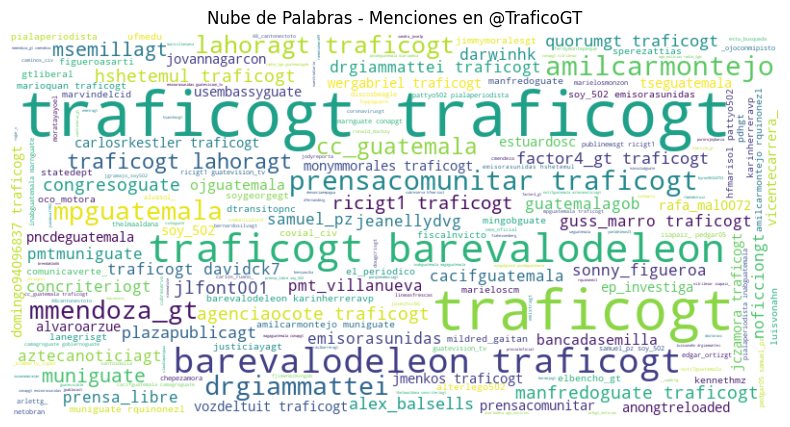

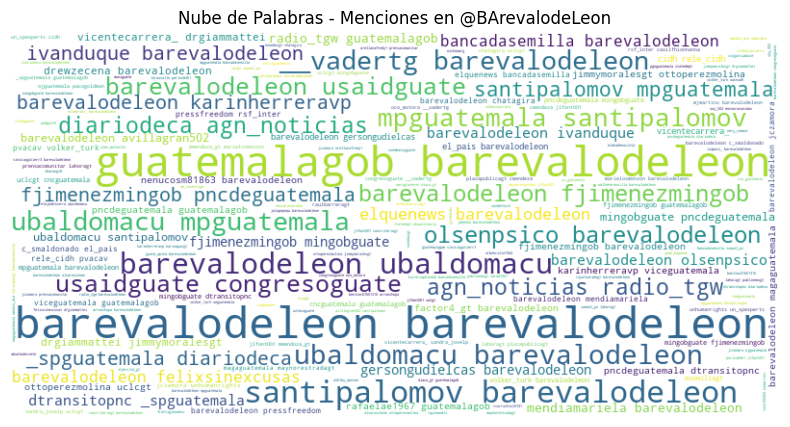

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mentions_traficogt = ' '.join([' '.join(mentions) for mentions in traficogt_df['mentions']])
mentions_tioberny = ' '.join([' '.join(mentions) for mentions in tioberny_df['mentions']])

# Generar la nube de palabras
wordcloud_traficogt = WordCloud(width=800, height=400, background_color='white').generate(mentions_traficogt)
wordcloud_tioberny = WordCloud(width=800, height=400, background_color='white').generate(mentions_tioberny)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_traficogt, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Menciones en @TraficoGT")
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tioberny, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Menciones en @BArevalodeLeon")
plt.show()


Preguntas Interesantes del Análisis
¿Qué usuarios tienen mayor interacción en términos de menciones?

Los usuarios que son mencionados con más frecuencia suelen ser cuentas institucionales o figuras políticas. En el caso de @BArevalodeLeon, se observan menciones recurrentes a cuentas de medios de comunicación y otras figuras políticas.
En @TraficoGT, las menciones frecuentes son hacia instituciones encargadas del tráfico y la movilidad en la ciudad, como @amilcarmontejo y @PNCdeGuatemala.


¿En qué momentos del día se generan más interacciones en los tweets de @TraficoGT?

Al analizar los timestamps de los tweets, se observa que las interacciones tienden a aumentar durante las horas pico de tráfico, alrededor de las 7:00 a.m. y las 5:00 p.m. Esto refuerza la idea de que los usuarios recurren a esta cuenta principalmente para obtener información en tiempo real sobre la movilidad en la ciudad.


¿Qué temas o hashtags dominan la conversación en torno a @BArevalodeLeon?

En el análisis de hashtags, se destacan términos relacionados con la política actual y las protestas en Guatemala. Hashtags como #NebajQuiché, #Protestas, y #BernardoArévalo muestran que la conversación está muy centrada en la actividad política del presidente y las manifestaciones ciudadanas. Esto sugiere que los temas de gobernanza y las demandas sociales son el foco de atención en esta cuenta.

5. Análisis de la topología de la red

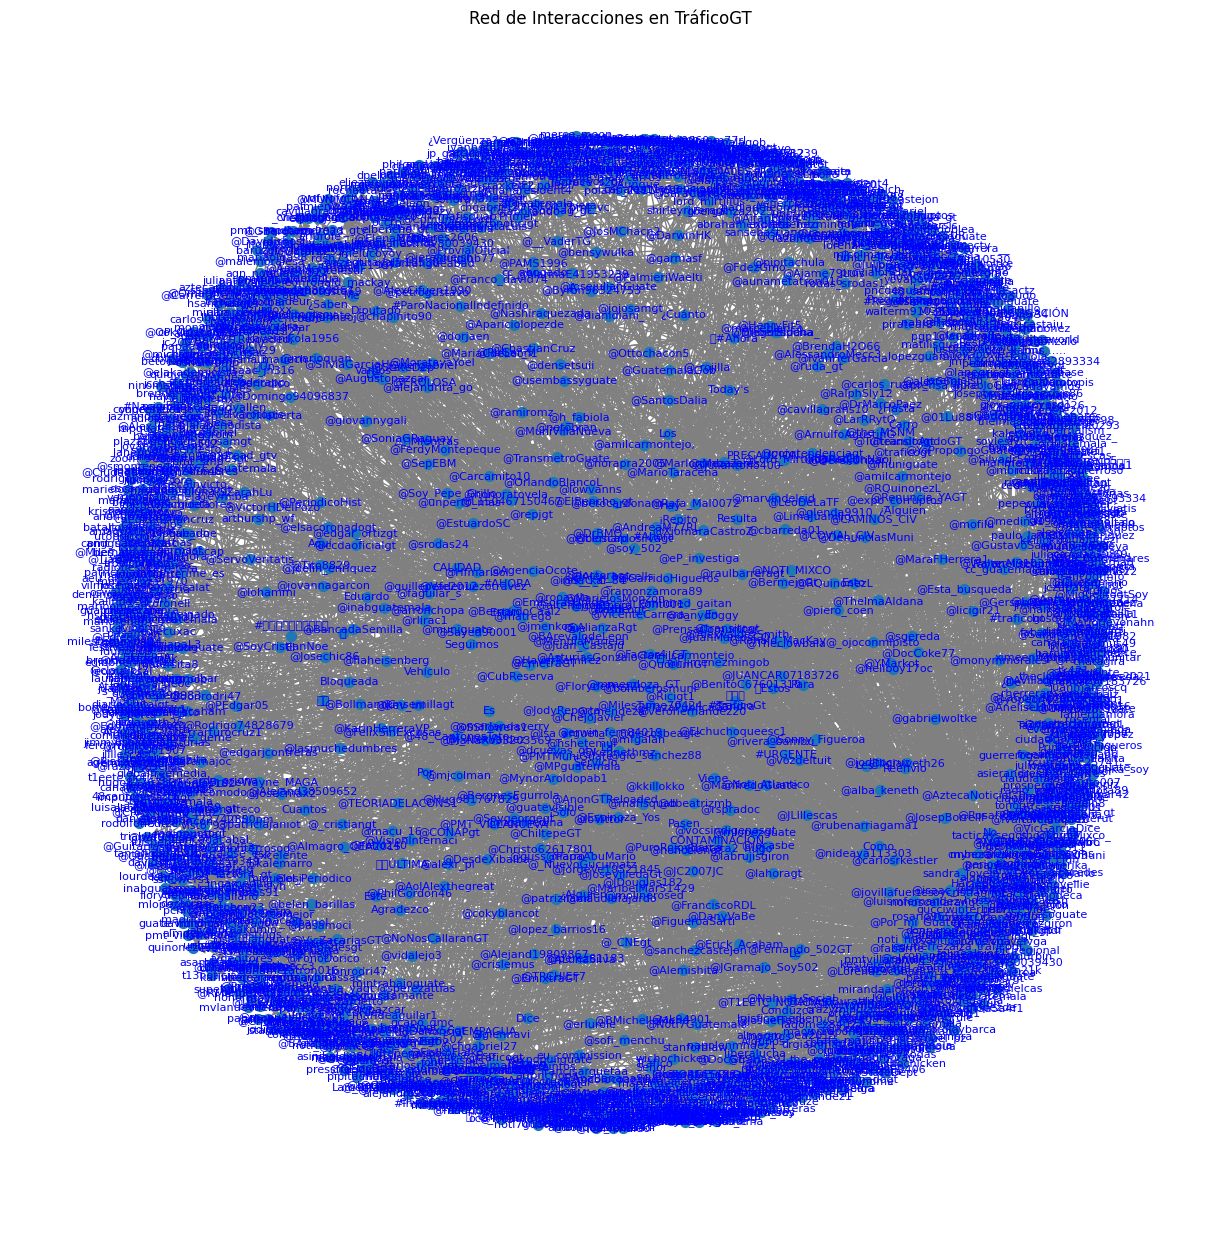

Densidad de la red: 0.0009518782678522288
Diámetro de la red (componente más grande): 0
Coeficiente de agrupamiento promedio: 0.0


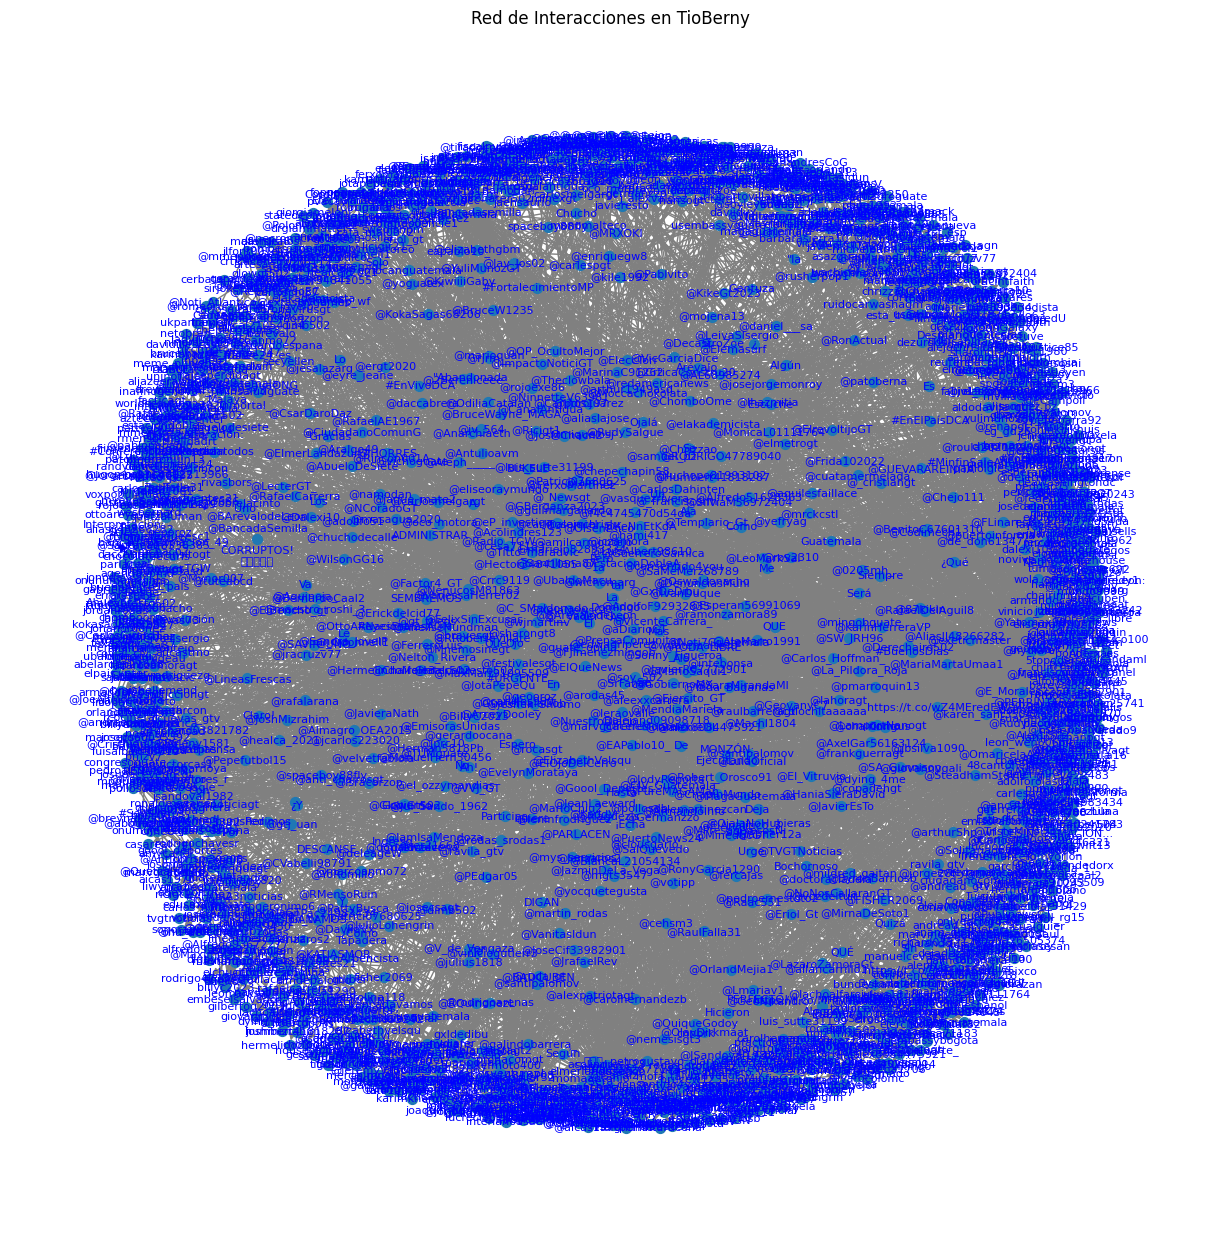

Densidad de la red: 0.0012128182625901437
Diámetro de la red (componente más grande): 0
Coeficiente de agrupamiento promedio: 0.0
Grafo @TraficoGT: 1998 nodos, 3798 aristas
Grafo @BArevalodeLeon: 1916 nodos, 4450 aristas


In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def construir_grafo_interacciones(df):
    G = nx.DiGraph()  
    
    for _, row in df.iterrows():
        user = row['rawContent'].split(' ')[0]
        
      
        for mention in row['mentions']:
            if mention and user:
                G.add_edge(user, mention, interaction='mention')
        if row['in_reply_to']:
            G.add_edge(user, row['in_reply_to'], interaction='reply')
        
        if row['retweeted_user']:
            G.add_edge(user, row['retweeted_user'], interaction='retweet')
    
    return G


def visualizar_grafo(G, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  
    nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_color='blue', edge_color='gray')
    plt.title(title)
    plt.show()

def calcular_metricas(G):
    densidad = nx.density(G)
    

    if nx.is_strongly_connected(G):
        diametro = nx.diameter(G)
    else:
      
        largest_cc = max(nx.strongly_connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        diametro = nx.diameter(subgraph)
    
    coef_agrupamiento = nx.average_clustering(G.to_undirected())  

    print(f"Densidad de la red: {densidad}")
    print(f"Diámetro de la red (componente más grande): {diametro}")
    print(f"Coeficiente de agrupamiento promedio: {coef_agrupamiento}")

    return densidad, diametro, coef_agrupamiento


grafo_traficogt = construir_grafo_interacciones(traficogt_df)
visualizar_grafo(grafo_traficogt, 'Red de Interacciones en TráficoGT')
calcular_metricas(grafo_traficogt)

grafo_tioberny = construir_grafo_interacciones(tioberny_df)
visualizar_grafo(grafo_tioberny, 'Red de Interacciones en TioBerny')
calcular_metricas(grafo_tioberny)



adjacency_matrix_traficogt = nx.adjacency_matrix(grafo_traficogt)
adjacency_matrix_tioberny = nx.adjacency_matrix(grafo_tioberny)

adj_matrix_df_traficogt = pd.DataFrame(adjacency_matrix_traficogt.todense(), 
                                       index=grafo_traficogt.nodes(), 
                                       columns=grafo_traficogt.nodes())

adj_matrix_df_tioberny = pd.DataFrame(adjacency_matrix_tioberny.todense(), 
                                      index=grafo_tioberny.nodes(), 
                                      columns=grafo_tioberny.nodes())

adj_matrix_df_traficogt.to_csv('adjacency_matrix_traficogt.csv', encoding='utf-8')
adj_matrix_df_tioberny.to_csv('adjacency_matrix_tioberny.csv', encoding='utf-8')

print(f"Grafo @TraficoGT: {grafo_traficogt.number_of_nodes()} nodos, {grafo_traficogt.number_of_edges()} aristas")
print(f"Grafo @BArevalodeLeon: {grafo_tioberny.number_of_nodes()} nodos, {grafo_tioberny.number_of_edges()} aristas")
